In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import random

In [2]:
data = pd.read_csv('dataset_LR.csv')

In [3]:
data.head()

,attr1,attr2,attr3,attr4,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
def my_train_test_split(X, y, train_size):
    '''
    my own data splitting function
    '''
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, train_size*100)

    X_Train = X[split]
    y_Train = y[split]
    X_Test =  X[~split]
    y_Test = y[~split]

    return X_Train, X_Test, y_Train, y_Test

In [5]:
def standardise_values(a):
    '''
    standardisation function, make data mean  = 0 and sd = 1
    '''
    mean = np.mean(a)
    sd = np.std(a)
    for i in range(len(a)):
        a[i] = (a[i]-mean)/sd
    return a

In [6]:
x = data.iloc[:,:-1].values    #feature attributes
y = data.iloc[:,-1:].values    #target attribute

#for i in range(len(x.T)):
#    x.T[i] = standardise_values(x.T[i])
    
z = np.ones((x.shape[0],1))
x = np.append(z,x,axis = 1)

print(x[0])
print(x.shape)

[ 1.          1.12180565  1.14945512 -0.97597007  0.35456135]
(1372, 5)


In [30]:
class logistic_regression:
    
    def __init__( self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def sigmoid(self, z):
        return (1/(1+np.exp(-z)))
    
    def grad_fit(self, X, Y, printRes):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n).reshape(self.n,1)
        
        costs = []
        accuracies = []
        iter_list = []
        for i in range(self.iterations):
            a = np.dot(X, self.W)
            z = self.sigmoid(a)
            
            cost = (-1/self.m) * (np.dot(Y.T, np.log(z)) + np.dot((1-Y).T, np.log(1-z)))
            if(i%50 == 0):
                costs.append(cost.flatten()[0])
            if(i%50 == 0 and printRes):

                Y_pred = self.predict(X)
                acc,b,c,d = self.metrics(Y_pred, Y)
                accuracies.append(acc)
                iter_list.append(i)
                print("Cost at ", i, "th iteration = ", cost, "and Accuracy = ", acc)
                
            dw = (1/self.m) * np.dot(X.T, (z-Y))
            
            self.W = self.W - (self.learning_rate * dw)
        
        if(printRes):print("\nFinal Weights = ", self.W)
        return costs, accuracies, iter_list, costs[-1]
            
    def stoc_grad_fit(self, X, Y, printRes):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n).reshape(self.n,1)
        
        costs = []
        accuracies = []
        iter_list = []
        for i in range(self.iterations):
            singleX = X[i%self.m].reshape(1,self.n)
            singleY = Y[i%self.m].reshape(1,1)
            
            singleA = np.dot(singleX, self.W)
            singleZ = self.sigmoid(singleA)
            a = np.dot(X, self.W)
            z = self.sigmoid(a)
            
            cost = (-1/self.m) * (np.dot(Y.T, np.log(z)) + np.dot((1-Y).T, np.log(1-z)))
            if(i%50 == 0):
                costs.append(cost.flatten()[0])
            
            if(i%50 == 0 and printRes):
                
                Y_pred = self.predict(X)
                acc,b,c,d = self.metrics(Y_pred, Y)
                accuracies.append(acc)
                iter_list.append(i)
                print("Cost at ", i, "th iteration = ", cost, "and Accuracy = ", acc)
                
            dw = np.dot(singleX.T, (singleZ-singleY))
            
            self.W = self.W - (self.learning_rate * dw)
            
        if(printRes):print("\nFinal Weights = ", self.W)
        return costs, accuracies, iter_list, costs[-1]
            
    def predict(self, X):
        pred = np.zeros(X.shape[0]).reshape(X.shape[0],1)
        prob = self.sigmoid(np.dot(X,self.W))
        for i in range(np.size(prob)):
            if(prob[i] >= 0.5):
                pred[i] = 1
            else:
                pred[i] = 0
        return pred
    
    def metrics(self, Y_pred, Y_test):
        accuracy_ = 0
        correctly_classified = 0
        count = 0
        tp = 0
        fp =0
        fn = 0
        for count in range(np.size(Y_pred)):
            if Y_test[count] == Y_pred[count] :
                correctly_classified = correctly_classified + 1
            if Y_test[count] == 1 and Y_pred[count] == 1:
                tp = tp + 1
            elif Y_test[count] == 0 and Y_pred[count] == 1:
                fp = fp + 1
            elif Y_test[count] == 1 and Y_pred[count] == 0:
                fn = fn + 1
        accuracy_ = ( correctly_classified / count ) * 100    
        precision_ = (tp + 1) / (tp + fp + 1)
        recall_ = (tp + 1) / (tp + fn + 1)
        fmeasure_ = (2 * precision_ * recall_) / (precision_ + recall_)
        return accuracy_, precision_, recall_, fmeasure_

In [8]:
### GRADIENT DESCENT ###
model = logistic_regression(0.01, 10000)

start = time.time()
finalaccuracies = np.zeros(10)
tfinalaccuracies = np.zeros(10)
precisions = np.zeros(10)
tprecisions = np.zeros(10)
recalls = np.zeros(10)
trecalls = np.zeros(10)
fmeasures = np.zeros(10)
tfmeasures = np.zeros(10)
finalcosts = np.zeros(10)

for i in range(10):
    X_train, X_test, Y_train, Y_test = my_train_test_split(x, y, 0.70)
    printR = 0
    if i==9:
        printR = 1
    costs, accuracies, iterations, finalcosts[i] = model.grad_fit(X_train, Y_train, printR)
    
    Y_pred = model.predict(X_test)
    finalaccuracies[i], precisions[i], recalls[i], fmeasures[i] = model.metrics(Y_pred, Y_test)
    
    Y_predt = model.predict(X_train)
    tfinalaccuracies[i], tprecisions[i], trecalls[i], tfmeasures[i] = model.metrics(Y_predt, Y_train)
    
print("\nUsing Gradient Descent...\n")
print("Final Accuracies = ",finalaccuracies,"\n")
print("Final Costs = ",finalcosts,"\n")

print("Train Set Metrics")
print("Mean Accuracy = ",np.mean(tfinalaccuracies))
print("Mean Loss = ",np.mean(finalcosts))
print("Mean Precision = ",np.mean(tprecisions))
print("Mean Recall = ",np.mean(trecalls))
print("Mean Fmeasure = ",np.mean(tfmeasures))

print("\nTest Set Metrics")
print("Mean Accuracy = ",np.mean(finalaccuracies))
print("Mean Loss = ",np.mean(finalcosts))
print("Mean Precision = ",np.mean(precisions))
print("Mean Recall = ",np.mean(recalls))
print("Mean Fmeasure = ",np.mean(fmeasures))

print("\nTime taken to build 10 classification models = ",round(time.time() - start, 2),"s")

Cost at  0 th iteration =  [[0.69314718]] and Accuracy =  43.48279457768509
Cost at  50 th iteration =  [[0.61393977]] and Accuracy =  85.92283628779978
Cost at  100 th iteration =  [[0.55667502]] and Accuracy =  86.75703858185611
Cost at  150 th iteration =  [[0.5133965]] and Accuracy =  87.2784150156413
Cost at  200 th iteration =  [[0.47933625]] and Accuracy =  87.69551616266945
Cost at  250 th iteration =  [[0.45161343]] and Accuracy =  88.52971845672576
Cost at  300 th iteration =  [[0.42842583]] and Accuracy =  89.36392075078207
Cost at  350 th iteration =  [[0.40860039]] and Accuracy =  89.88529718456726
Cost at  400 th iteration =  [[0.39134437]] and Accuracy =  90.30239833159541
Cost at  450 th iteration =  [[0.37610385]] and Accuracy =  90.92805005213765
Cost at  500 th iteration =  [[0.36248028]] and Accuracy =  91.24087591240875
Cost at  550 th iteration =  [[0.35017941]] and Accuracy =  91.55370177267987
Cost at  600 th iteration =  [[0.33897909]] and Accuracy =  91.762252

Cost at  5500 th iteration =  [[0.10796583]] and Accuracy =  98.01876955161627
Cost at  5550 th iteration =  [[0.10741219]] and Accuracy =  98.01876955161627
Cost at  5600 th iteration =  [[0.10686695]] and Accuracy =  98.01876955161627
Cost at  5650 th iteration =  [[0.10632993]] and Accuracy =  98.01876955161627
Cost at  5700 th iteration =  [[0.10580092]] and Accuracy =  98.01876955161627
Cost at  5750 th iteration =  [[0.10527974]] and Accuracy =  98.01876955161627
Cost at  5800 th iteration =  [[0.10476623]] and Accuracy =  98.1230448383733
Cost at  5850 th iteration =  [[0.10426021]] and Accuracy =  98.1230448383733
Cost at  5900 th iteration =  [[0.10376151]] and Accuracy =  98.1230448383733
Cost at  5950 th iteration =  [[0.10326997]] and Accuracy =  98.1230448383733
Cost at  6000 th iteration =  [[0.10278544]] and Accuracy =  98.1230448383733
Cost at  6050 th iteration =  [[0.10230776]] and Accuracy =  98.1230448383733
Cost at  6100 th iteration =  [[0.10183679]] and Accuracy 

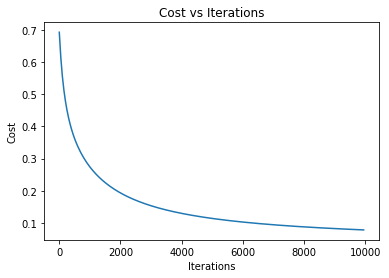

In [9]:
plt.plot(iterations, costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

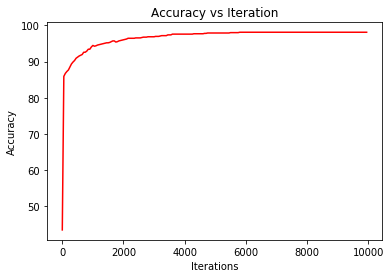

In [10]:
plt.plot(iterations, accuracies, color='red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iteration')
plt.show()

In [31]:
### STOCHASTIC GRADIENT DESCENT ###
model = logistic_regression(0.1, 10000)

start = time.time()
finalaccuracies = np.zeros(10)
tfinalaccuracies = np.zeros(10)
precisions = np.zeros(10)
tprecisions = np.zeros(10)
recalls = np.zeros(10)
trecalls = np.zeros(10)
fmeasures = np.zeros(10)
tfmeasures = np.zeros(10)
finalcosts = np.zeros(10)

for i in range(10):
    X_train, X_test, Y_train, Y_test = my_train_test_split(x, y, 0.70)
    printR = 0
    if i==9:
        printR = 1
    costs, accuracies, iterations, finalcosts[i] = model.stoc_grad_fit(X_train, Y_train, printR)
    
    Y_pred = model.predict(X_test)
    finalaccuracies[i], precisions[i], recalls[i], fmeasures[i] = model.metrics(Y_pred, Y_test)
    
    Y_predt = model.predict(X_train)
    tfinalaccuracies[i], tprecisions[i], trecalls[i], tfmeasures[i] = model.metrics(Y_predt, Y_train)

print("Using Stochastic Gradient Descent...\n")

print("Train Set Metrics")
print("Mean Accuracy = ",np.mean(tfinalaccuracies))
print("Mean Loss = ",np.mean(finalcosts))
print("Mean Precision = ",np.mean(tprecisions))
print("Mean Recall = ",np.mean(trecalls))
print("Mean Fmeasure = ",np.mean(tfmeasures))

print("\nTest Set Metrics")
print("Mean Accuracy = ",np.mean(finalaccuracies))
print("Mean Loss = ",np.mean(finalcosts))
print("Mean Precision = ",np.mean(precisions))
print("Mean Recall = ",np.mean(recalls))
print("Mean Fmeasure = ",np.mean(fmeasures))

print("Time taken to build 10 classification models = ",round(time.time() - start, 2),"s")

Cost at  0 th iteration =  [[0.69314718]] and Accuracy =  44.73409801876955
Cost at  50 th iteration =  [[0.5200523]] and Accuracy =  68.82168925964547
Cost at  100 th iteration =  [[0.55612342]] and Accuracy =  65.69343065693431
Cost at  150 th iteration =  [[0.61337644]] and Accuracy =  62.9822732012513
Cost at  200 th iteration =  [[0.68478141]] and Accuracy =  59.64546402502607
Cost at  250 th iteration =  [[0.76059106]] and Accuracy =  55.89155370177268
Cost at  300 th iteration =  [[0.79181302]] and Accuracy =  55.89155370177268
Cost at  350 th iteration =  [[0.81361439]] and Accuracy =  56.20437956204379
Cost at  400 th iteration =  [[0.83709158]] and Accuracy =  55.683003128258605
Cost at  450 th iteration =  [[0.86169975]] and Accuracy =  55.47445255474452
Cost at  500 th iteration =  [[0.89716514]] and Accuracy =  55.370177267987486
Cost at  550 th iteration =  [[0.39320085]] and Accuracy =  81.02189781021897
Cost at  600 th iteration =  [[0.1747834]] and Accuracy =  94.99478

Cost at  5550 th iteration =  [[0.04755673]] and Accuracy =  98.22732012513035
Cost at  5600 th iteration =  [[0.0498839]] and Accuracy =  98.1230448383733
Cost at  5650 th iteration =  [[0.05066878]] and Accuracy =  98.01876955161627
Cost at  5700 th iteration =  [[0.05142171]] and Accuracy =  98.01876955161627
Cost at  5750 th iteration =  [[0.05277787]] and Accuracy =  98.01876955161627
Cost at  5800 th iteration =  [[0.04848995]] and Accuracy =  98.22732012513035
Cost at  5850 th iteration =  [[0.04665285]] and Accuracy =  98.22732012513035
Cost at  5900 th iteration =  [[0.04551148]] and Accuracy =  98.22732012513035
Cost at  5950 th iteration =  [[0.04477439]] and Accuracy =  98.1230448383733
Cost at  6000 th iteration =  [[0.0455208]] and Accuracy =  98.54014598540147
Cost at  6050 th iteration =  [[0.04897795]] and Accuracy =  98.22732012513035
Cost at  6100 th iteration =  [[0.05048422]] and Accuracy =  98.85297184567257
Cost at  6150 th iteration =  [[0.05154627]] and Accurac

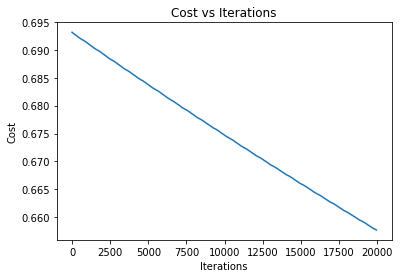

In [12]:
plt.plot(iterations, costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

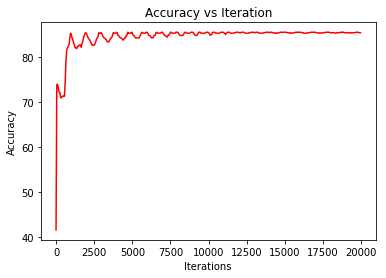

In [13]:
plt.plot(iterations, accuracies, color='red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iteration')
plt.show()